In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = df['PRICE']
x_data = df.drop(['PRICE'], axis=1, inplace=False)

In [3]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, x_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE: ', np.round(neg_mse_scores, 2))
print('5 folds의 개별 RMSE: ', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE: ', avg_rmse)

5 folds의 개별 Negative MSE:  [-11.42 -24.29 -28.14 -74.6  -28.52]
5 folds의 개별 RMSE:  [3.38 4.93 5.31 8.64 5.34]
5 folds의 평균 RMSE:  5.518166280868973


In [4]:
alphas = [0, 0.1, 1, 10, 100]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    
    neg_mse_scores = cross_val_score(ridge, x_data, y_target, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    
    
    print('5 folds의 개별 Negative MSE: ', np.round(neg_mse_scores, 2))
    print('5 folds의 개별 RMSE: ', np.round(rmse_scores, 2))
    print('5 folds의 평균 RMSE: ', avg_rmse)
    print('--------------------------')
    

5 folds의 개별 Negative MSE:  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE:  [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE:  5.828658946215808
--------------------------
5 folds의 개별 Negative MSE:  [-12.32 -25.2  -32.43 -80.7  -32.88]
5 folds의 개별 RMSE:  [3.51 5.02 5.7  8.98 5.73]
5 folds의 평균 RMSE:  5.7884866270324125
--------------------------
5 folds의 개별 Negative MSE:  [-11.71 -23.58 -29.69 -80.23 -31.12]
5 folds의 개별 RMSE:  [3.42 4.86 5.45 8.96 5.58]
5 folds의 평균 RMSE:  5.652570965613546
--------------------------
5 folds의 개별 Negative MSE:  [-11.42 -24.29 -28.14 -74.6  -28.52]
5 folds의 개별 RMSE:  [3.38 4.93 5.31 8.64 5.34]
5 folds의 평균 RMSE:  5.518166280868973
--------------------------
5 folds의 개별 Negative MSE:  [-12.82 -27.28 -34.68 -52.69 -22.05]
5 folds의 개별 RMSE:  [3.58 5.22 5.89 7.26 4.7 ]
5 folds의 평균 RMSE:  5.329589628472148
--------------------------


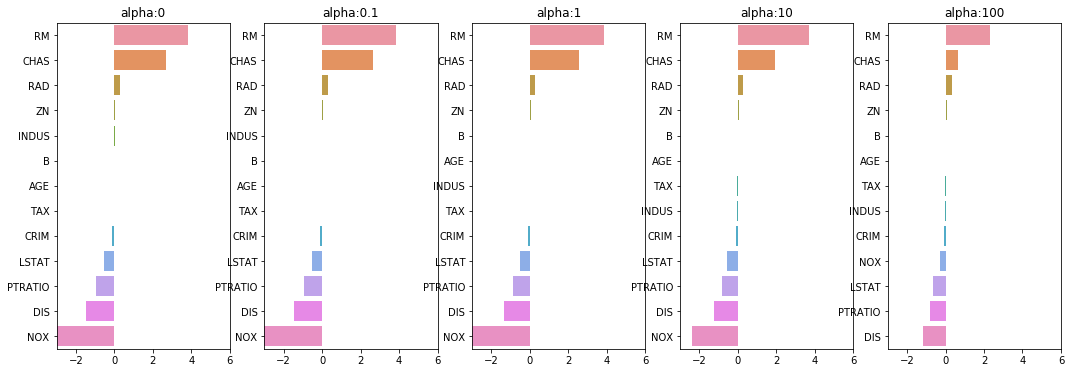

In [5]:
fig, axs = plt.subplots(figsize=(18, 6), nrows=1, ncols=5)

coeff = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(x_data, y_target)
    
    series = pd.Series(data=ridge.coef_, index=x_data.columns)
    colname = 'alpha:' + str(alpha)
    coeff[colname] = series
    
    series = series.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=series.values, y=series.index, ax=axs[pos])
    
plt.show()

In [6]:
colname = 'alpha:' + str(alphas[0])
coeff.sort_values(by=colname, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


In [7]:
'alpha:' + str(alphas[0])

'alpha:0'

In [32]:
from sklearn.linear_model import Lasso, ElasticNet

def get_linear_reg_eval(name, params=None, data=None, target=None, verbose=True):
    df = pd.DataFrame()
    if verbose: print("#######", name, "########")
    for param in params:
        if name == "Ridge": model = Ridge(alpha=param)
        elif name == "Lasso": model = Lasso(alpha=param)
        elif name == "ElasticNet": model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, data, target,
                                        scoring='neg_mean_squared_error', cv=5)
        rmse_scores = np.sqrt(-1 * neg_mse_scores)
        avg_rmse = np.mean(rmse_scores)
        
        print('5 folds의 평균 RMSE: ', avg_rmse)
        
        model.fit(data, target)
        
        coeff = pd.Series(data=model.coef_)
        colname = 'alpha:' + str(param)
        df[colname] = coeff
    return df        

In [15]:
alphas = [0.07, 0.1, 0.5, 1, 3]
df = get_linear_reg_eval("Lasso", params=alphas, data=x_data, target=y_target)

####### Lasso ########
5 folds의 평균 RMSE:  5.612284267526674
5 folds의 평균 RMSE:  5.615116035266936
5 folds의 평균 RMSE:  5.669123409594897
5 folds의 평균 RMSE:  5.776020813823375
5 folds의 평균 RMSE:  6.1887632108009045


In [16]:
sort_column = 'alpha:'+str(alphas[0])
df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


In [18]:
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
df = get_linear_reg_eval("ElasticNet", params=elastic_alphas, data=x_data, target=y_target)

####### ElasticNet ########
5 folds의 평균 RMSE:  5.541654347348141
5 folds의 평균 RMSE:  5.52592849629491
5 folds의 평균 RMSE:  5.466748649445585
5 folds의 평균 RMSE:  5.596874445109748
5 folds의 평균 RMSE:  6.068121638621162


In [19]:
sort_column = 'alpha:'+str(elastic_alphas[0])
df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

def get_scaled_data(method='None', degrees=None, data=None):
    if method=='Standard':
        scaled = StandardScaler().fit_transform(data)
    elif method=='MinMax':
        scaled = MinMaxScaler().fit_transform(data)
    elif method=='Log':
        scaled = np.log1p(data).to_numpy()
    else:
        scaled = data
        
    if degrees != None:
        scaled = PolynomialFeatures(degree=degrees,
                                   include_bias=False).fit_transform(scaled)
        
    return scaled

In [66]:
np.log1p(x_data).to_numpy()

array([[0.00630011, 2.94443898, 1.19694819, ..., 2.79116511, 5.98620072,
        1.78842057],
       [0.02694374, 0.        , 2.08815348, ..., 2.93385687, 5.98620072,
        2.316488  ],
       [0.02692427, 0.        , 2.08815348, ..., 2.93385687, 5.97591934,
        1.61541998],
       ...,
       [0.05898563, 0.        , 2.55955019, ..., 3.09104245, 5.98620072,
        1.89311196],
       [0.10399058, 0.        , 2.55955019, ..., 3.09104245, 5.97749239,
        2.01223279],
       [0.04632045, 0.        , 2.55955019, ..., 3.09104245, 5.98620072,
        2.18380156]])

In [67]:
MinMaxScaler().fit_transform(x_data)

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        2.87234043e-01, 1.00000000e+00, 8.96799117e-02],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 1.00000000e+00, 2.04470199e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 9.89737254e-01, 6.34657837e-02],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.07891832e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 9.91300620e-01, 1.31070640e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.69701987e-01]])

In [68]:
alphas = [0.1, 1, 10, 100]

methods = [(None, None),
           ('Standard', None), ('Standard', 2), 
           ('MinMax', None), ('MinMax', 2), 
           ('Log', None)]

for method in methods:
    scaled = get_scaled_data(method=method[0], degrees=method[1],
                            data=x_data)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(method[0], method[1]))
    get_linear_reg_eval('Ridge', params=alphas, data=scaled, target=y_target, verbose=False)


## 변환 유형:None, Polynomial Degree:None
5 folds의 평균 RMSE:  5.7884866270324125
5 folds의 평균 RMSE:  5.652570965613546
5 folds의 평균 RMSE:  5.518166280868973
5 folds의 평균 RMSE:  5.329589628472148

## 변환 유형:Standard, Polynomial Degree:None
5 folds의 평균 RMSE:  5.825992799389442
5 folds의 평균 RMSE:  5.802889517257738
5 folds의 평균 RMSE:  5.6368312225590715
5 folds의 평균 RMSE:  5.421374711794968

## 변환 유형:Standard, Polynomial Degree:2
5 folds의 평균 RMSE:  8.827235873001722
5 folds의 평균 RMSE:  6.871287525962414
5 folds의 평균 RMSE:  5.484870425533339
5 folds의 평균 RMSE:  4.6344377782619235

## 변환 유형:MinMax, Polynomial Degree:None
5 folds의 평균 RMSE:  5.763570225288301
5 folds의 평균 RMSE:  5.465045081564938
5 folds의 평균 RMSE:  5.754163637679423
5 folds의 평균 RMSE:  7.634919863623537

## 변환 유형:MinMax, Polynomial Degree:2
5 folds의 평균 RMSE:  5.297560003127186
5 folds의 평균 RMSE:  4.32266037152489
5 folds의 평균 RMSE:  5.185204257580535
5 folds의 평균 RMSE:  6.537866889704364

## 변환 유형:Log, Polynomial Degree:None
5 folds의 평균 RMSE:  